# EDA and Clustering

This was one of the first assignments I completed in my course and I was very new to coding at this stage. Since this project I have learned a lot but I feel it still showcases good exploratory data analysis and an exploration of clustering methods.

The project aim was to create data visualisations and explore the data for good candidates that may be used to clustering from a dataset that was being used to cluster employees into gropus as to their likelihood of resigning.

The project used K Nearest Neighbours and DB Scan Algorithms, and used a range of hyperparameter tuning techniques (Silhouette Score, Elbow Method w/Inertia) and metrics (Rand Index, Homogenity and Completeness) to evaluate models.

In [341]:
#loading relevant libraries and data for visualisation/exploration
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Evaluation
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import rand_score

In [342]:
Employee_data_filepath = 'A2_HR_Employee_Data.csv'
df = pd.read_csv(Employee_data_filepath, sep=',', header=0, index_col= False)
df

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2824,41,Yes,Travel_Rarely,Sales,2,Female,4,Single,5993,...,11,3,63.0,8,0,1,6,4,0,5
1,1409,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,...,23,4,40.0,10,3,3,10,7,1,7
2,5506,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,...,15,3,50.0,7,3,3,0,0,0,0
3,5012,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,...,11,3,48.0,8,3,3,8,7,3,0
4,4657,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,...,12,3,40.0,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,7940,36,No,Travel_Frequently,Consultants,2,Male,4,Married,2571,...,17,3,40.0,17,3,3,5,2,0,3
1466,1886,39,No,Travel_Rarely,Consultants,1,Male,1,Married,9991,...,15,3,40.0,9,5,3,7,7,1,7
1467,3868,27,No,Travel_Rarely,Consultants,3,Male,2,Married,6142,...,20,4,49.0,6,0,3,6,2,0,3
1468,7925,49,No,Travel_Frequently,Sales,3,Male,2,Married,5390,...,14,3,40.0,17,3,2,9,6,0,8


In [343]:
#checking data was loaded correctly and scanning for a clean dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Resigned                  1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   BusinessUnit              1470 non-null   object 
 5   EducationLevel            1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   JobSatisfaction           1470 non-null   int64  
 8   MaritalStatus             1470 non-null   object 
 9   MonthlyIncome             1470 non-null   int64  
 10  NumCompaniesWorked        1470 non-null   int64  
 11  OverTime                  1470 non-null   object 
 12  PercentSalaryHike         1470 non-null   int64  
 13  PerformanceRating         1470 non-null   int64  
 14  AverageW

In [344]:
df.describe()

,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,5491.933333,36.923810,2.912925,2.728571,6502.931293,2.693197,15.209524,3.153741,43.042177,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,2573.640304,9.135373,1.024165,1.102846,4707.956783,2.498009,3.659938,0.360824,5.389864,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1006.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3286.250000,30.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,40.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5484.500000,36.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,40.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,7766.250000,43.000000,4.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,47.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9991.000000,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,71.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Business Operations')

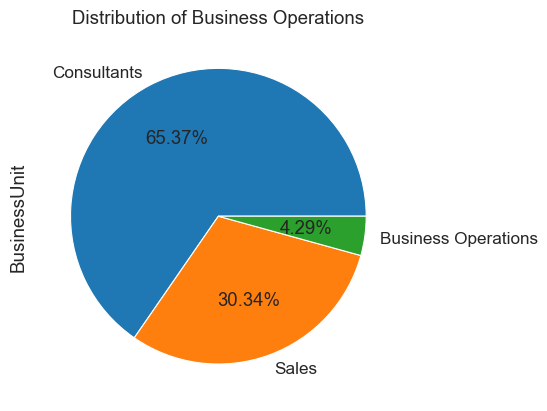

In [345]:
#to start I am going to do a very broad view of the business structure
#distribution of workforce
sns.set_context('paper', font_scale = 1.4)
df['BusinessUnit'].value_counts().plot(kind='pie', autopct='{:.2f}%'.format)
plt.title("Distribution of Business Operations")

I do not have the domain knowledge to understand the required ratio of sales: consultants and/or management. Company could look into having enough consultants to meet the sales work or have a better distribution of managers for projects.

In [346]:
#creating a separate df to compare for research goals
dfconsultants = df[df['BusinessUnit'] == 'Consultants']
dfconsultants

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1409,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,...,23,4,40.0,10,3,3,10,7,1,7
2,5506,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,...,15,3,50.0,7,3,3,0,0,0,0
3,5012,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,...,11,3,48.0,8,3,3,8,7,3,0
4,4657,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,...,12,3,40.0,6,3,3,2,2,2,2
5,3286,32,No,Travel_Frequently,Consultants,2,Male,4,Single,3068,...,13,3,40.0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,4950,31,No,Non-Travel,Consultants,3,Male,1,Single,9936,...,19,3,40.0,10,2,3,9,4,1,7
1465,7940,36,No,Travel_Frequently,Consultants,2,Male,4,Married,2571,...,17,3,40.0,17,3,3,5,2,0,3
1466,1886,39,No,Travel_Rarely,Consultants,1,Male,1,Married,9991,...,15,3,40.0,9,5,3,7,7,1,7
1467,3868,27,No,Travel_Rarely,Consultants,3,Male,2,Married,6142,...,20,4,49.0,6,0,3,6,2,0,3


Text(0.5, 1.0, 'Distrubition of Consultants Who Resigned')

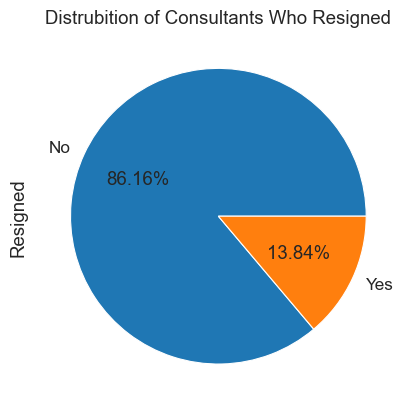

In [347]:
dfconsultants['Resigned'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distrubition of Consultants Who Resigned')

In [348]:
dfcn = dfconsultants[dfconsultants['Resigned'] == 'No']
dfcy = dfconsultants[dfconsultants['Resigned'] == 'Yes']

Text(0.5, 1.0, 'Distrubition of Current Consultants by Gender')

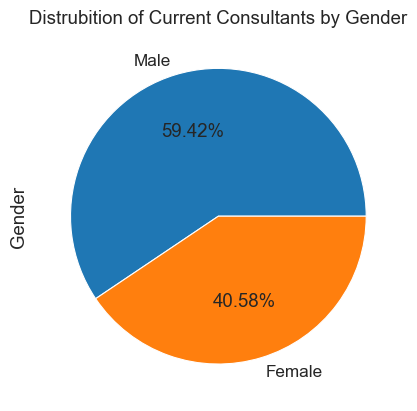

In [349]:
dfcn['Gender'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distrubition of Current Consultants by Gender')

Text(0.5, 1.0, 'Distrubition of Consultants Who Resigned By Gender')

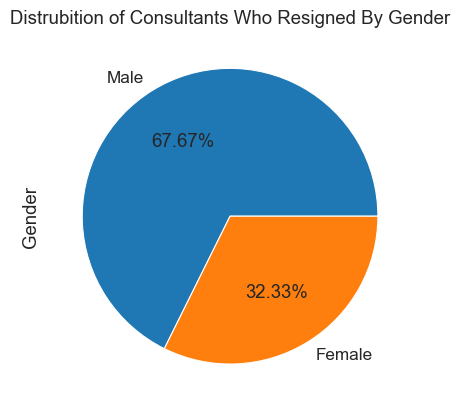

In [350]:
dfcy['Gender'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distrubition of Consultants Who Resigned By Gender')

There is a greater ratio of males resigning than females within the company.

In [351]:
dfcn.describe()

,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,5372.193237,37.615942,2.910628,2.769324,6630.326087,2.702899,15.288647,3.157005,42.335749,11.865942,2.826087,2.748792,7.171498,4.387681,2.179952,4.282609
std,2578.664503,8.931681,1.024126,1.093534,5010.479172,2.474272,3.651044,0.364025,4.580156,7.746757,1.320912,0.688258,5.967024,3.662377,3.190484,3.604691
min,1006.000000,18.000000,1.000000,1.000000,1051.000000,0.000000,11.000000,3.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3162.000000,31.000000,2.000000,2.000000,2902.250000,1.000000,12.000000,3.000000,40.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5258.500000,36.000000,3.000000,3.000000,4708.000000,2.000000,14.000000,3.000000,40.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,7735.500000,43.250000,4.000000,4.000000,8624.000000,4.000000,18.000000,3.000000,40.000000,16.250000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,9991.000000,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,69.000000,37.000000,6.000000,4.000000,36.000000,18.000000,15.000000,17.000000


In [352]:
dfcy.describe()

,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5206.045113,33.473684,2.827068,2.458647,4108.075188,2.924812,15.308271,3.195489,47.593985,8.082707,2.586466,2.578947,4.954887,2.706767,1.872180,2.849624
std,2488.476642,9.902233,1.026256,1.118110,3393.026241,2.675999,4.013576,0.398076,7.991508,7.332002,1.256063,0.863489,6.048872,3.192752,3.262304,3.090788
min,1021.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2958.000000,28.000000,2.000000,1.000000,2362.000000,1.000000,12.000000,3.000000,40.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,5315.000000,31.000000,3.000000,3.000000,2759.000000,1.000000,14.000000,3.000000,50.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,6974.000000,38.000000,4.000000,3.000000,4213.000000,5.000000,18.000000,3.000000,52.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,9984.000000,58.000000,5.000000,4.000000,19859.000000,9.000000,25.000000,4.000000,71.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Text(0.5, 1.0, 'Job Satisfaction Among Consultants')

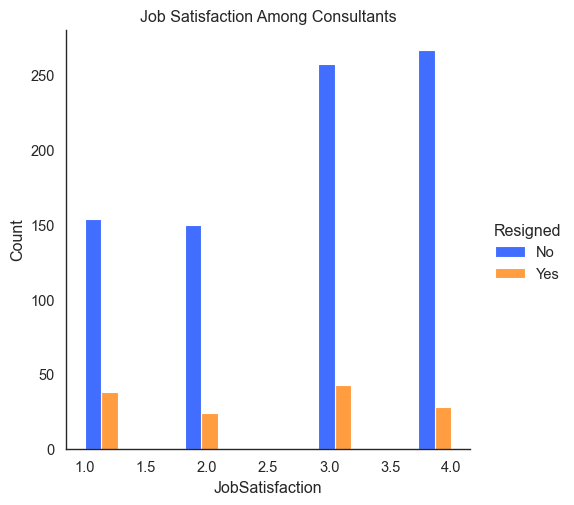

In [353]:
sns.set_style('white')
sns.set_context('paper', font_scale = 1.2)
sns.displot(dfconsultants, x='JobSatisfaction', hue="Resigned", multiple = "dodge", palette = 'bright')
plt.grid = True
plt.title('Job Satisfaction Among Consultants')

The next input was more for my own learning to try and make a multi-levelled if/else group. I understand that his is probably not the most robust coding and in place of creating a function like this I could just use .describe() or individual descriptive values.

In [354]:
def descriptive_stats_consultants(x):
    print('Data for The Resigned Group \n',
      dfconsultants[x][dfconsultants['Resigned'] == 'Yes'].describe(), '\n')
    print('Data for the Current Group \n',
      dfconsultants[x][dfconsultants['Resigned'] == 'No'].describe(), '\n')

    if (dfconsultants[x][dfconsultants['Resigned'] == 'No'].mean() >
    dfconsultants[x][dfconsultants['Resigned'] == 'Yes'].mean()):
        print('Employees who resigned had a lower average ', x)
    else:
        if(dfconsultants[x][dfconsultants['Resigned'] == 'No'].mean() <
    dfconsultants[x][dfconsultants['Resigned'] == 'Yes'].mean()):
            print('Employees who resigned had a higher average ', x)
        else:
            print('Employees who resigned had the same average ', x)

    if (dfconsultants[x][dfconsultants['Resigned'] == 'No'].median() >
        dfconsultants[x][dfconsultants['Resigned'] == 'Yes'].median()):
        print('Employees who resigned had a lower median ', x)
    else:
        if(dfconsultants[x][dfconsultants['Resigned'] == 'No'].mean() <
    dfconsultants[x][dfconsultants['Resigned'] == 'Yes'].mean()):
            print('Employees who resigned had a higher median ', x)
        else:
            print('Employees who resigned had the same median ', x)

In [355]:
descriptive_stats_consultants('JobSatisfaction')

Data for The Resigned Group 
 count    133.000000
mean       2.458647
std        1.118110
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: JobSatisfaction, dtype: float64 

Data for the Current Group 
 count    828.000000
mean       2.769324
std        1.093534
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: JobSatisfaction, dtype: float64 

Employees who resigned had a lower average  JobSatisfaction
Employees who resigned had the same median  JobSatisfaction


Whilst this datapoint is subjective as a rating for employees who resigned. The lower average Job Satisfaction amongst employees who resigned suggests that there is potential for improvement within the company to retain staff.

Text(0.5, 1.0, 'Education Level Among Consultants')

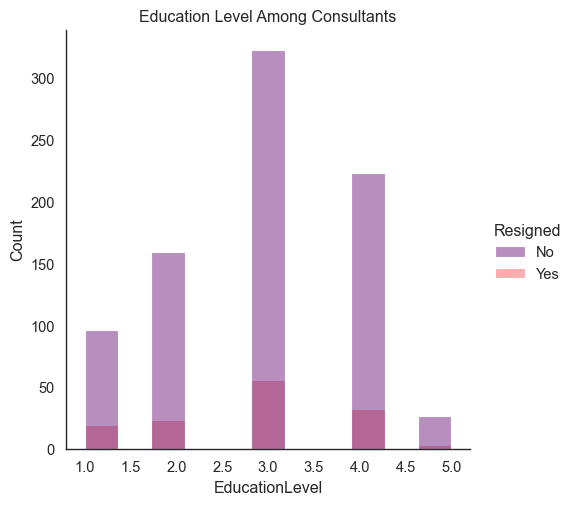

In [356]:
sns.set_style('white')
sns.set_context('paper', font_scale = 1.2)
sns.displot(dfconsultants, x='EducationLevel', hue="Resigned", palette = 'magma')
plt.grid = True
plt.title('Education Level Among Consultants')

(0.0, 0.00022396042141845804)

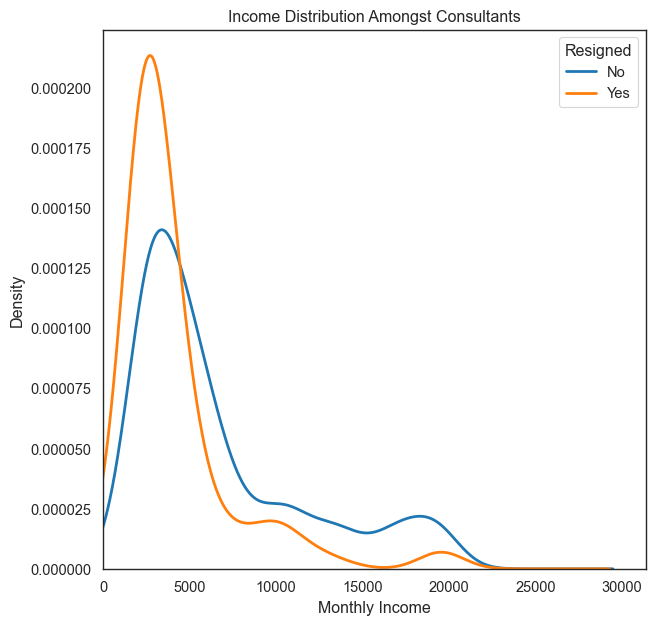

In [357]:
income_consultants = dfconsultants.pivot(columns = 'Resigned', values = 'MonthlyIncome')
income_consultants.plot.density(figsize = (7,7), linewidth = 2, )
plt.xlabel('Monthly Income')
plt.title('Income Distribution Amongst Consultants')
plt.xlim(0)
plt.ylim(0)

In [358]:
descriptive_stats_consultants('MonthlyIncome')

Data for The Resigned Group 
 count      133.000000
mean      4108.075188
std       3393.026241
min       1009.000000
25%       2362.000000
50%       2759.000000
75%       4213.000000
max      19859.000000
Name: MonthlyIncome, dtype: float64 

Data for the Current Group 
 count      828.000000
mean      6630.326087
std       5010.479172
min       1051.000000
25%       2902.250000
50%       4708.000000
75%       8624.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64 

Employees who resigned had a lower average  MonthlyIncome
Employees who resigned had a lower median  MonthlyIncome


The mean income appears to be 38.0% lower for employees who resign and this remains true until the maximal range which is more likely to be to more personalised factors. This appears to be a good candidate for the company to address as to whether the renumeration is fair for all employees

(0.0, 0.000157201191672315)

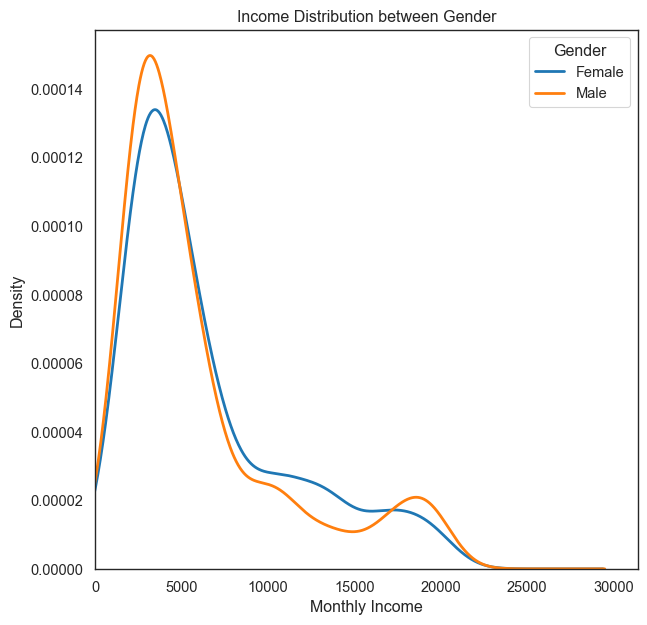

In [359]:
income_consultants_g = dfconsultants.pivot(columns = 'Gender', values = 'MonthlyIncome')
income_consultants_g.plot.density(figsize = (7,7), linewidth = 2, )
plt.xlabel('Monthly Income')
plt.title('Income Distribution between Gender')
plt.xlim(0)
plt.ylim(0)

In [360]:
income_consultants_g.describe()

Gender,Female,Male
count,379.000000,582.000000
mean,6513.691293,6129.888316
std,4808.354321,4950.209893
min,1129.000000,1009.000000
25%,2886.000000,2693.250000
50%,4615.000000,4174.500000
75%,8613.500000,6879.750000
max,19973.000000,19999.000000


From the above table it can be seen that Females mostly earn a marginally higher income.

(0.0, 0.04616567435408733)

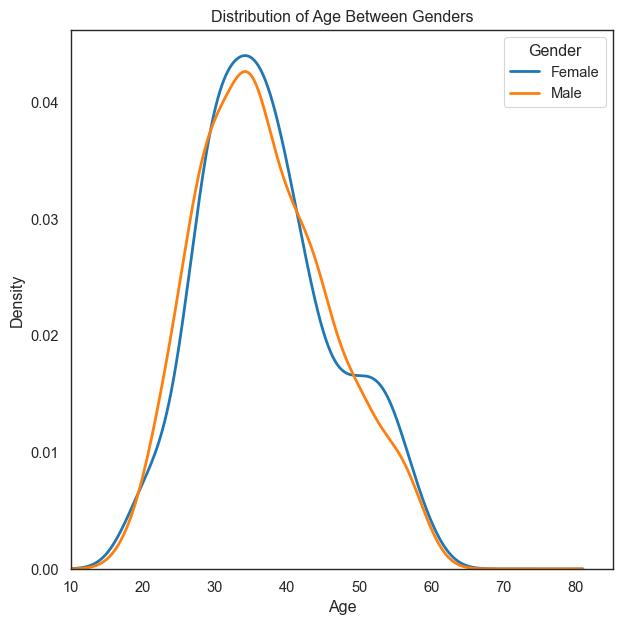

In [361]:
#distribution of age
data_wide_2 = dfconsultants.pivot(columns = 'Gender', values = 'Age')
data_wide_2.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Age')
plt.title('Distribution of Age Between Genders')
plt.xlim(10)
plt.ylim(0)

(0.0, 0.05000388376846038)

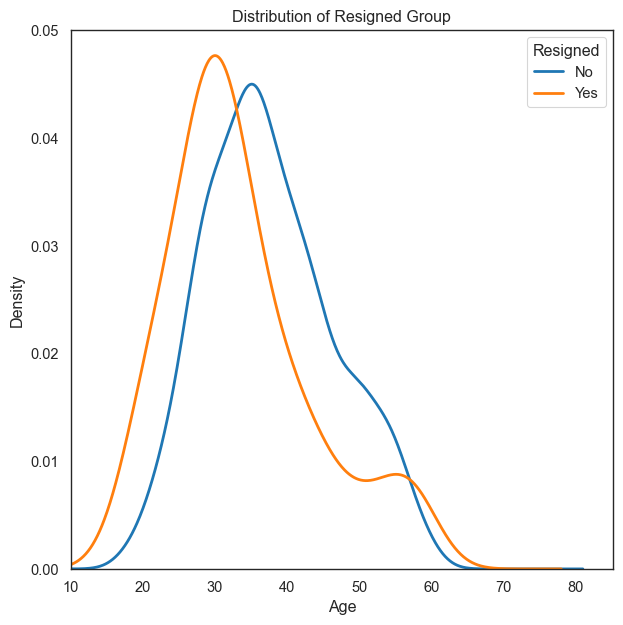

In [362]:
data_wide_3 = dfconsultants.pivot(columns = 'Resigned', values = 'Age')
data_wide_3.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Age')
plt.title('Distribution of Resigned Group')
plt.xlim(10)
plt.ylim(0)

In [363]:
data_wide_3.describe()

Resigned,No,Yes
count,828.000000,133.000000
mean,37.615942,33.473684
std,8.931681,9.902233
min,18.000000,18.000000
25%,31.000000,28.000000
50%,36.000000,31.000000
75%,43.250000,38.000000
max,60.000000,58.000000


Text(0.5, 1.0, 'Working Hours Between Current and Ex-Consultants')

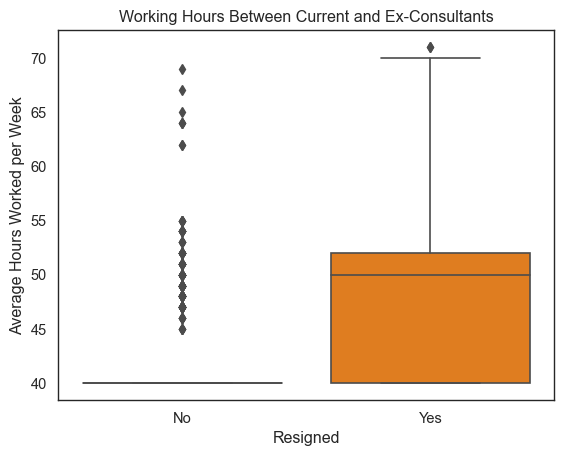

In [364]:
#working hours between groups
sns.boxplot(data = dfconsultants, y = 'AverageWeeklyHoursWorked', x = 'Resigned', palette = 'bright')
plt.ylabel('Average Hours Worked per Week')
plt.title("Working Hours Between Current and Ex-Consultants")

In [365]:
descriptive_stats_consultants('AverageWeeklyHoursWorked')

Data for The Resigned Group 
 count    133.000000
mean      47.593985
std        7.991508
min       40.000000
25%       40.000000
50%       50.000000
75%       52.000000
max       71.000000
Name: AverageWeeklyHoursWorked, dtype: float64 

Data for the Current Group 
 count    828.000000
mean      42.335749
std        4.580156
min       40.000000
25%       40.000000
50%       40.000000
75%       40.000000
max       69.000000
Name: AverageWeeklyHoursWorked, dtype: float64 

Employees who resigned had a higher average  AverageWeeklyHoursWorked
Employees who resigned had a higher median  AverageWeeklyHoursWorked


The above graph and statistics demonstrate that employees who are in the resigned group work worked a mean 5.26 hours more per week, with the median difference being 10 hours difference. This makes a good candidate for the modelling process and looks like a significant factor to address for the company

Text(0.5, 1.0, 'Distribution of Consultants Who Reported OT')

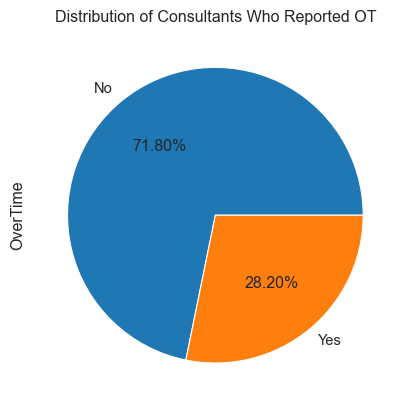

In [366]:
dfconsultants['OverTime'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distribution of Consultants Who Reported OT')

Text(0.5, 1.0, 'Distribution of Consultants Who Resigned + Reported OverTime')

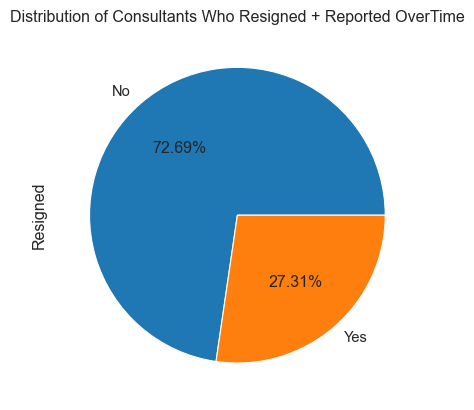

In [367]:
 dfconsultants['Resigned'][dfconsultants['OverTime'] == 'Yes'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distribution of Consultants Who Resigned + Reported OverTime')

Text(0.5, 1.0, 'Distribution of Consultants Who Did Not Report OverTime')

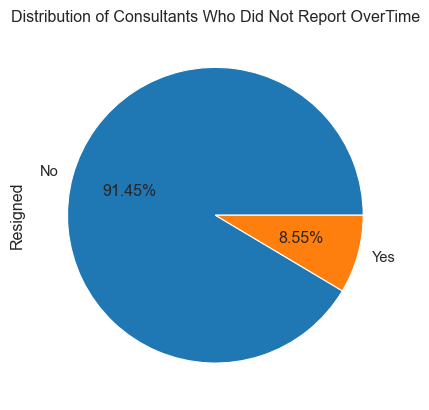

In [368]:
dfconsultants['Resigned'][dfconsultants['OverTime'] == 'No'].value_counts().plot(kind = 'pie', autopct = '{:.2f}%'.format)
plt.title('Distribution of Consultants Who Did Not Report OverTime')

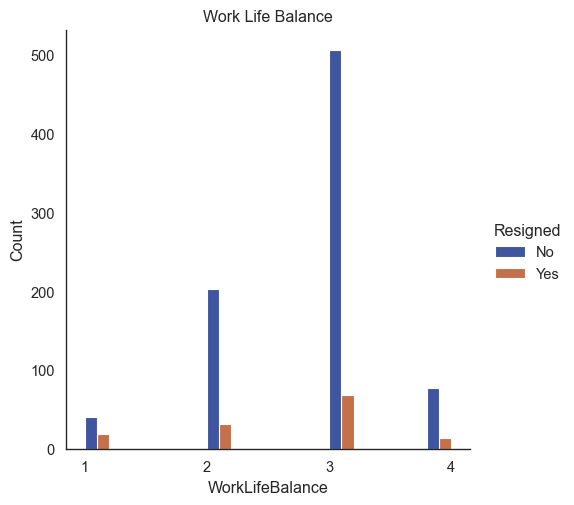

In [369]:

sns.displot(dfconsultants, x="WorkLifeBalance", hue="Resigned", multiple = "dodge", palette = 'dark')
plt.title('Work Life Balance')
plt.xticks(range(1, 5))
plt.grid = True

<Axes: xlabel='BusinessTravel', ylabel='count'>

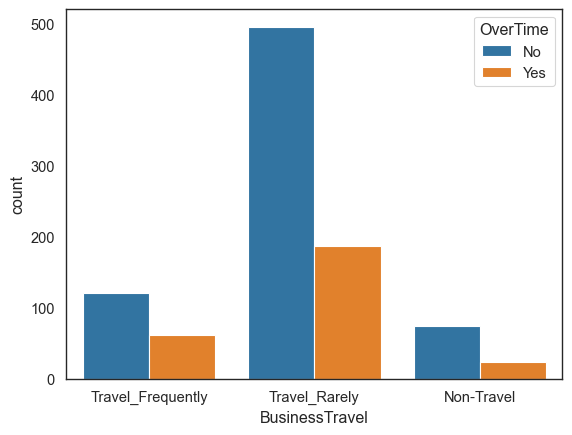

In [370]:
sns.countplot(data = dfconsultants, x = 'BusinessTravel', hue = 'OverTime')

In [371]:
data_wide_4 = dfconsultants.pivot(columns = "Resigned", values = "WorkLifeBalance")
data_wide_4.describe()

Resigned,No,Yes
count,828.000000,133.000000
mean,2.748792,2.578947
std,0.688258,0.863489
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,4.000000,4.000000


From this we can see that consultants who reported overtime were 3.19x more likely to resign. Interestingly this didn't appear to hold true to reported work life balance feature and business travel did not appear to be correlated with Over Time. Addressing overtime is definitely a recommendation for the company to address. Possible reasons in that the expectations are too high for either work volume or performance etc. 

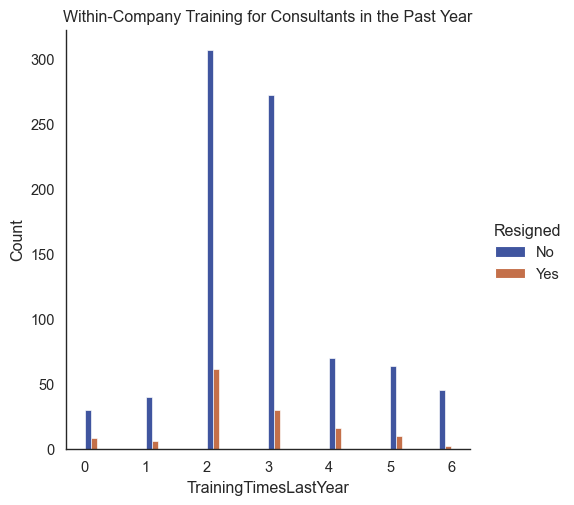

In [372]:
#training provided by company
sns.displot(dfconsultants, x = 'TrainingTimesLastYear', hue="Resigned", multiple = "dodge", palette = 'dark')
plt.title('Within-Company Training for Consultants in the Past Year')
plt.grid = True

In [373]:
descriptive_stats_consultants('TrainingTimesLastYear')

Data for The Resigned Group 
 count    133.000000
mean       2.586466
std        1.256063
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: TrainingTimesLastYear, dtype: float64 

Data for the Current Group 
 count    828.000000
mean       2.826087
std        1.320912
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: TrainingTimesLastYear, dtype: float64 

Employees who resigned had a lower average  TrainingTimesLastYear
Employees who resigned had a lower median  TrainingTimesLastYear


(0.0, 0.14431811109877166)

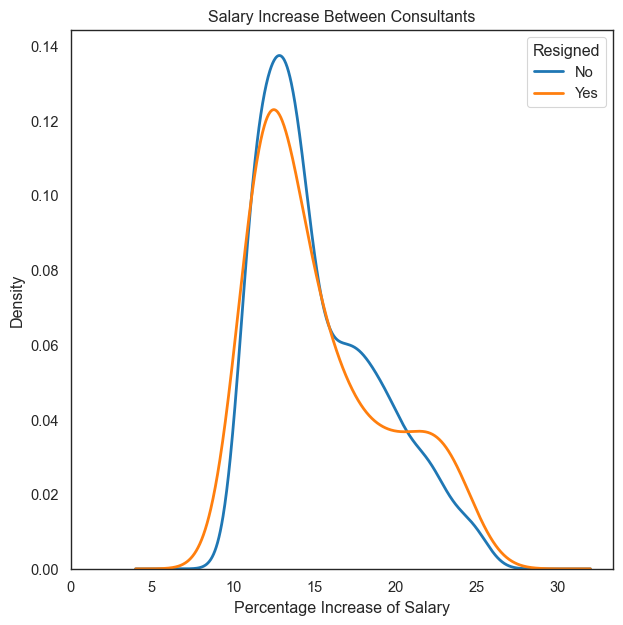

In [374]:
salaryhike = dfconsultants.pivot(columns = 'Resigned', values = 'PercentSalaryHike')
salaryhike.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Percentage Increase of Salary')
plt.title('Salary Increase Between Consultants')
plt.xlim(0)
plt.ylim(0)

In [375]:
salaryhike.describe()

Resigned,No,Yes
count,828.000000,133.000000
mean,15.288647,15.308271
std,3.651044,4.013576
min,11.000000,11.000000
25%,12.000000,12.000000
50%,14.000000,14.000000
75%,18.000000,18.000000
max,25.000000,25.000000


The difference between Salary Hike did not appear to be significant between resignation groups by visual estimation.

(0.0, 0.1791046984781893)

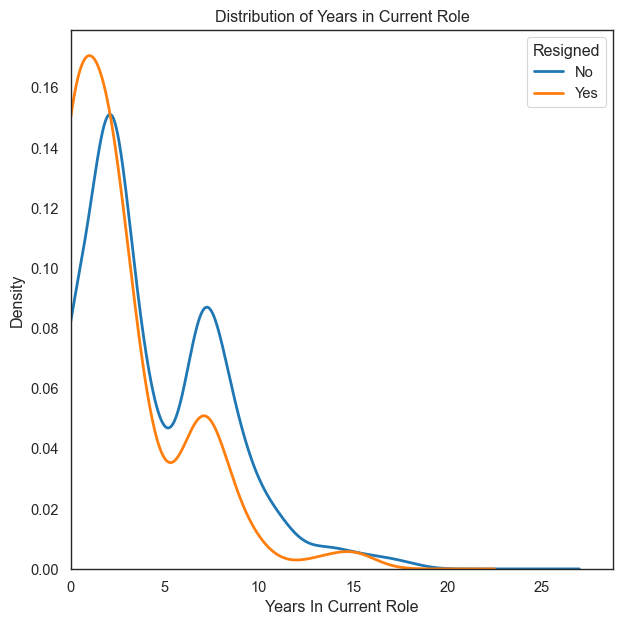

In [376]:
data_wide_5 = dfconsultants.pivot(columns='Resigned', values = 'YearsInRole')
data_wide_5.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Years In Current Role')
plt.title('Distribution of Years in Current Role')
plt.xlim(0)
plt.ylim(0)

In [377]:
descriptive_stats_consultants('YearsInRole')

Data for The Resigned Group 
 count    133.000000
mean       2.706767
std        3.192752
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: YearsInRole, dtype: float64 

Data for the Current Group 
 count    828.000000
mean       4.387681
std        3.662377
min        0.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       18.000000
Name: YearsInRole, dtype: float64 

Employees who resigned had a lower average  YearsInRole
Employees who resigned had a lower median  YearsInRole


(0.0, 0.27931303024410453)

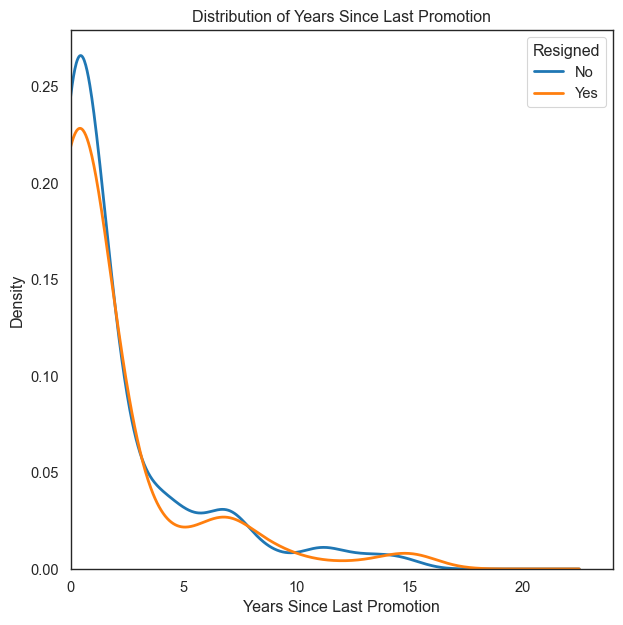

In [378]:
data_wide_6 = dfconsultants.pivot(columns='Resigned', values = 'YearsSinceLastPromotion')
data_wide_6.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Years Since Last Promotion')
plt.title('Distribution of Years Since Last Promotion')
plt.xlim(0)
plt.ylim(0)

In [379]:
descriptive_stats_consultants('YearsSinceLastPromotion')

Data for The Resigned Group 
 count    133.000000
mean       1.872180
std        3.262304
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: YearsSinceLastPromotion, dtype: float64 

Data for the Current Group 
 count    828.000000
mean       2.179952
std        3.190484
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       15.000000
Name: YearsSinceLastPromotion, dtype: float64 

Employees who resigned had a lower average  YearsSinceLastPromotion
Employees who resigned had the same median  YearsSinceLastPromotion


(0.0, 0.16989620260130717)

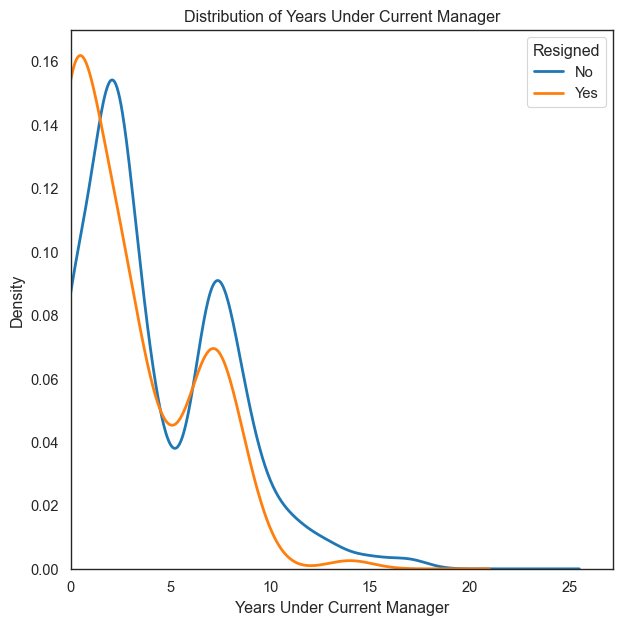

In [380]:
data_wide_7 = dfconsultants.pivot(columns='Resigned', values = 'YearsWithCurrManager')
data_wide_7.plot.density(figsize = (7,7), linewidth = 2)
plt.xlabel('Years Under Current Manager')
plt.title('Distribution of Years Under Current Manager')
plt.xlim(0)
plt.ylim(0)

In [381]:
data_wide_7.describe()

Resigned,No,Yes
count,828.000000,133.000000
mean,4.282609,2.849624
std,3.604691,3.090788
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,2.000000
75%,7.000000,5.000000
max,17.000000,14.000000


The above few columns do not appear to have significant standing or difference between columns. I investigated these columsn to investigate whether employees who were leaving were doing so for either: inconsistent management structure (i.e. too many managers in a shorter period of time), prolonged time in current position, or too many years in the same role before being promoted. Employees who had remained in the same role longer, or with the same manager appeared to be less likely to resign. This does remain consistent with the employees age and it does not appear from superficial analysis that these values contribute to employee resigniation.

# Feature Relationship Exploration

Text(0.5, 1.0, 'Working Hours vs Income in Consultants')

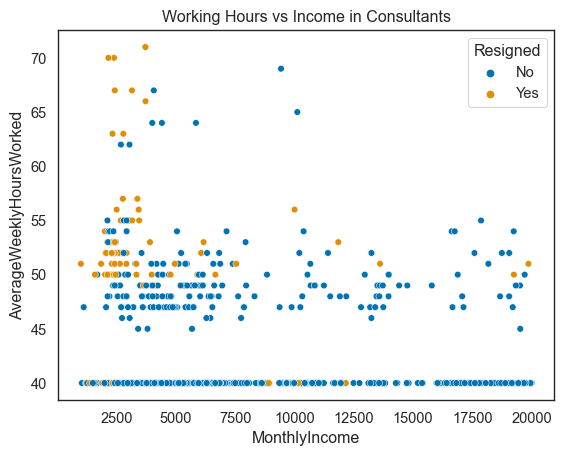

In [382]:
sns.scatterplot(data=dfconsultants, x = 'MonthlyIncome', y = 'AverageWeeklyHoursWorked', hue = 'Resigned', palette= 'colorblind')
plt.title("Working Hours vs Income in Consultants")

Text(0.5, 1.0, 'Working Hours vs Income in Consultants')

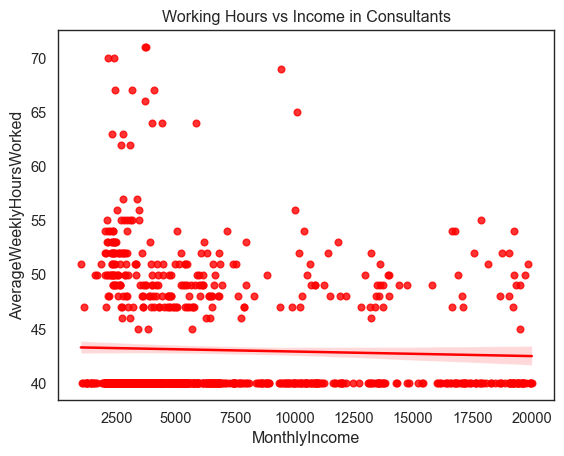

In [383]:
sns.regplot(data=dfconsultants, x = 'MonthlyIncome', y = 'AverageWeeklyHoursWorked', color = 'red')
plt.title("Working Hours vs Income in Consultants")

visually there appears to be a greater density of consultants who resigned in the top left 'quadrant' of the above graph.

Text(0, 0.5, 'Average Hours Worked')

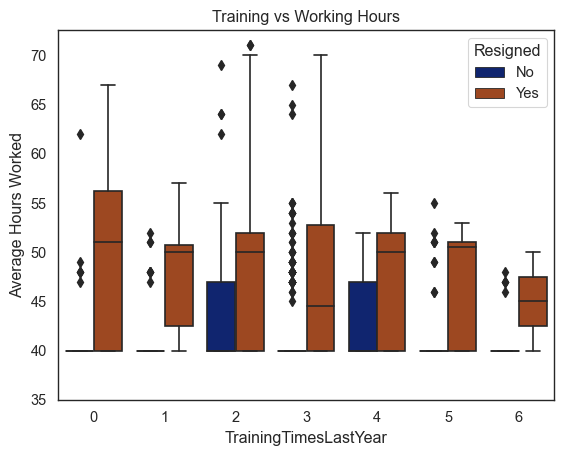

In [384]:
sns.boxplot(data=dfconsultants, x = 'TrainingTimesLastYear', y = 'AverageWeeklyHoursWorked', hue = 'Resigned', palette= 'dark')
plt.title("Training vs Working Hours")
plt.ylim(35)
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Average Hours Worked')

Text(0.5, 1.0, 'Training v Working Hours')

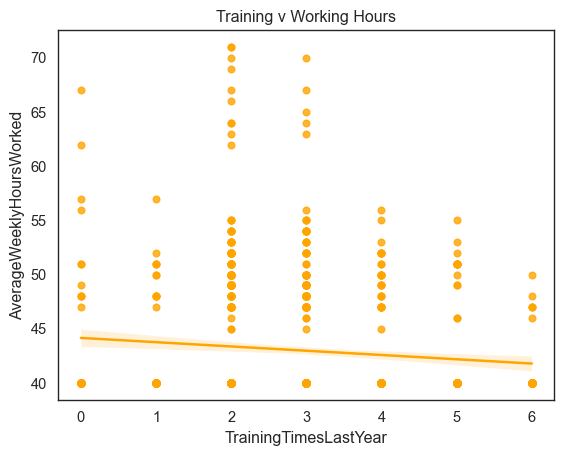

In [385]:
sns.regplot(data=dfconsultants, x = 'TrainingTimesLastYear', y = 'AverageWeeklyHoursWorked', color = 'orange')
plt.title("Training v Working Hours")

There is a slight negative relationship between training and working hours.

Text(0.5, 1.0, 'Age vs Weekly Working Hours')

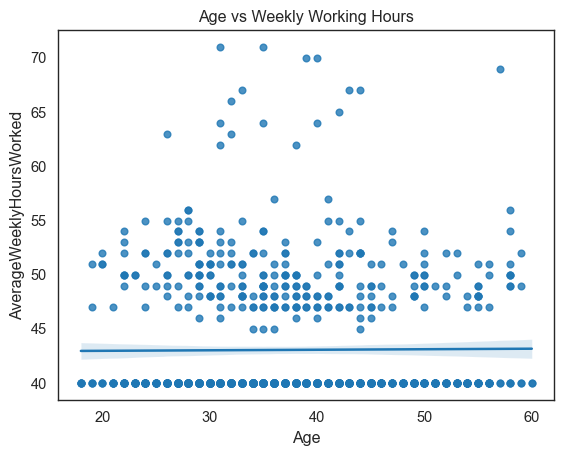

In [386]:
sns.regplot(data=dfconsultants, x = 'Age', y = 'AverageWeeklyHoursWorked')
plt.title("Age vs Weekly Working Hours")

Text(0.5, 1.0, 'Age vs Weekly in Consultants for >40h/week')

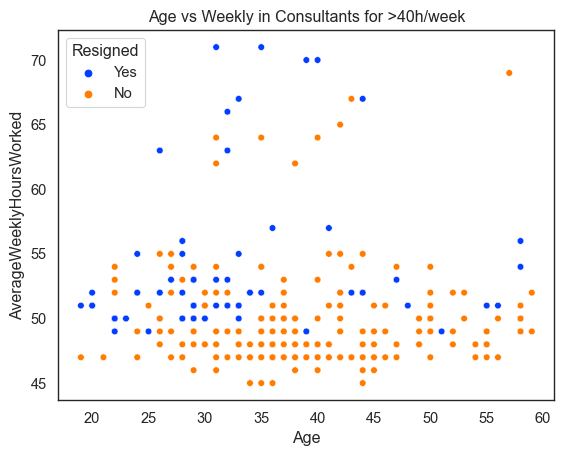

In [387]:
sns.scatterplot(data=dfconsultants[dfconsultants['AverageWeeklyHoursWorked'] > 40], x = 'Age', y = 'AverageWeeklyHoursWorked', hue = 'Resigned', palette= 'bright')
plt.title("Age vs Weekly in Consultants for >40h/week")

Text(0.5, 1.0, 'Training vs Promotion Prospects')

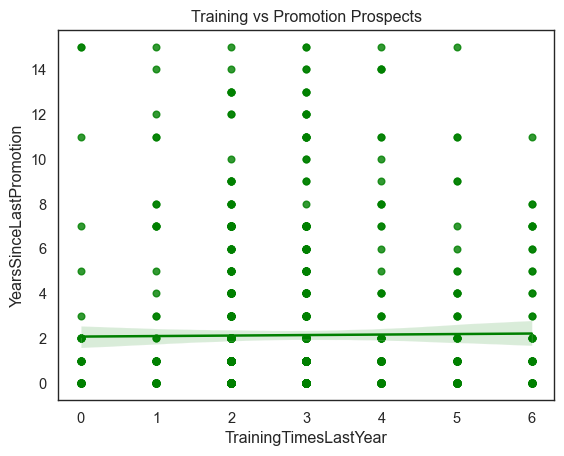

In [388]:
sns.regplot(data=dfconsultants,  x = 'TrainingTimesLastYear', y = 'YearsSinceLastPromotion', color = 'green')
plt.title("Training vs Promotion Prospects")

There appears to be a very weak correlation between training and propsects of promotion in the resigned group but not in the current employee group

Text(0, 0.5, 'Salary Hike %')

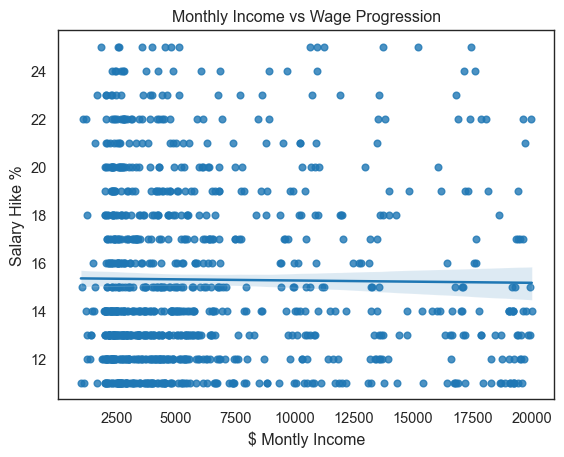

In [389]:
sns.regplot(data=dfconsultants, x = 'MonthlyIncome', y = 'PercentSalaryHike')
plt.title("Monthly Income vs Wage Progression")
plt.xlabel('$ Montly Income')
plt.ylabel('Salary Hike %')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

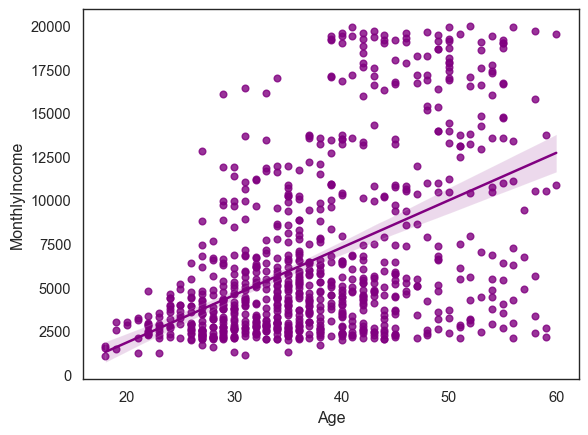

In [390]:
sns.regplot(data = dfcn, x = 'Age', y = 'MonthlyIncome', color = 'purple')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

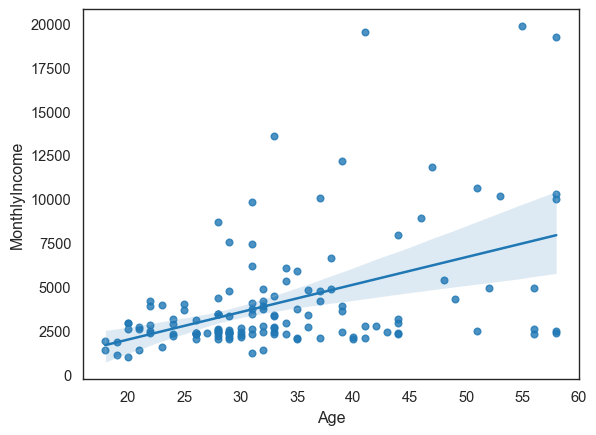

In [391]:
sns.regplot(data = dfcy, x = 'Age', y = 'MonthlyIncome')

<Axes: xlabel='MonthlyIncome', ylabel='AverageWeeklyHoursWorked'>

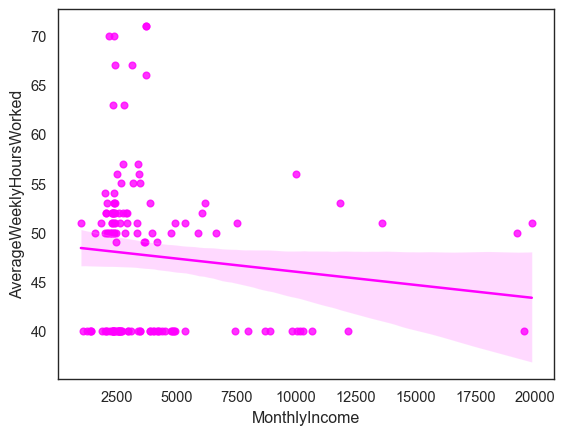

In [392]:
sns.regplot(data = dfcy, x = 'MonthlyIncome', y = 'AverageWeeklyHoursWorked', color = 'Magenta')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

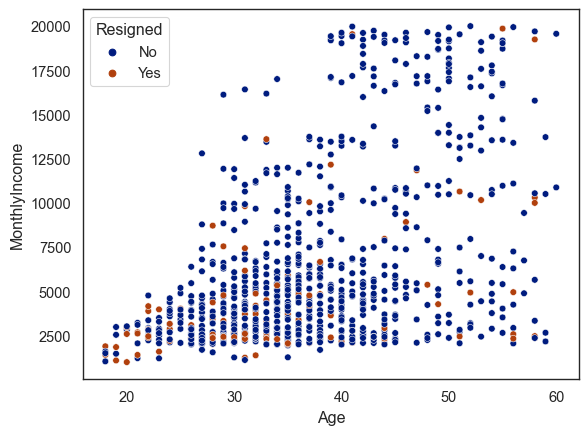

In [393]:
sns.scatterplot(data = dfconsultants, x = 'Age', y = 'MonthlyIncome', hue = 'Resigned', palette = 'dark')

Text(0.5, 1.0, 'Hours Worked vs Reported Work Life Balance')

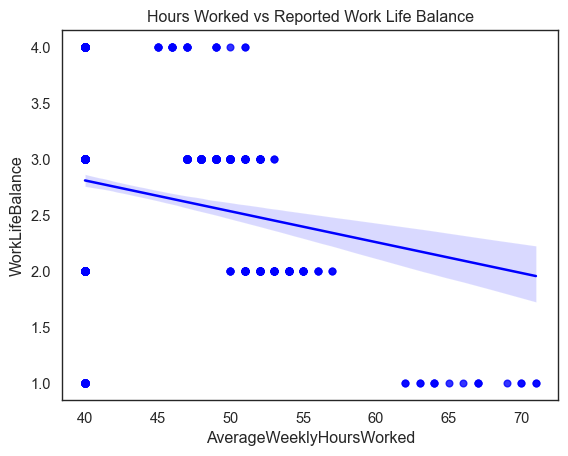

In [394]:
sns.regplot(data=dfconsultants, x = 'AverageWeeklyHoursWorked', y = 'WorkLifeBalance', color = 'blue')
plt.title('Hours Worked vs Reported Work Life Balance')

Unsuprisingly, increased working hours appears is negatively correlated with reported work-life balance.

Text(0, 0.5, 'Reported Work Life Balance')

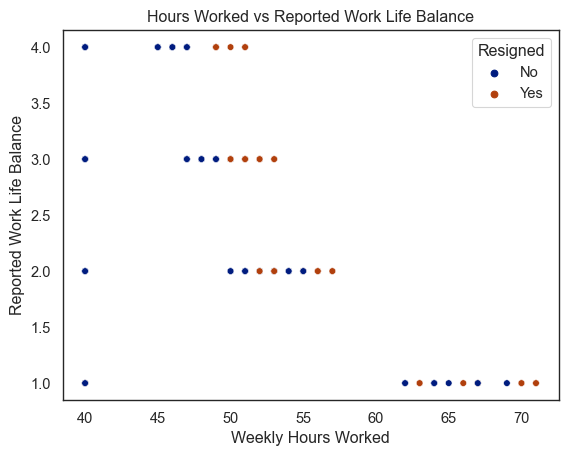

In [395]:
sns.scatterplot(data=dfconsultants, x = 'AverageWeeklyHoursWorked', y = 'WorkLifeBalance', hue = 'Resigned', palette = 'dark')
plt.title('Hours Worked vs Reported Work Life Balance')
plt.xlabel('Weekly Hours Worked')
plt.ylabel('Reported Work Life Balance')

(0.0, 52.659838247635385)

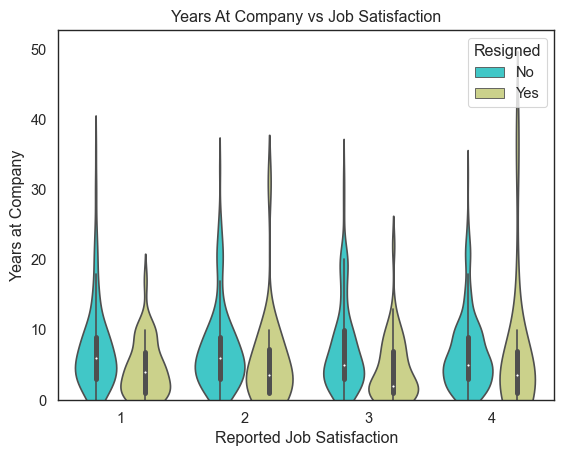

In [396]:
sns.violinplot(data=dfconsultants, x = 'JobSatisfaction', y = 'YearsAtCompany', hue = 'Resigned', palette= 'rainbow')
plt.title("Years At Company vs Job Satisfaction")
plt.xlabel('Reported Job Satisfaction')
plt.ylabel('Years at Company')
plt.ylim(0)

<Axes: xlabel='JobSatisfaction', ylabel='YearsAtCompany'>

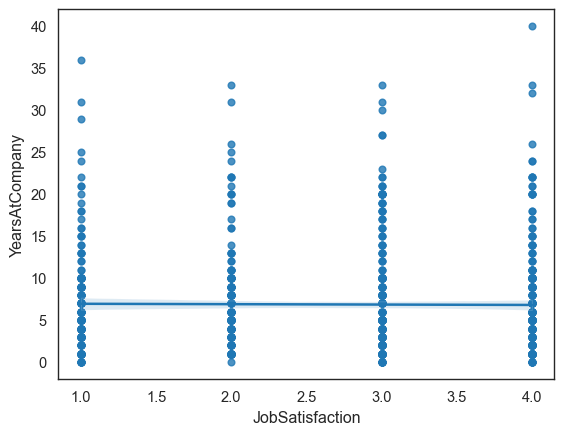

In [397]:
sns.regplot(data=dfconsultants, x = 'JobSatisfaction', y = 'YearsAtCompany')

No correlation between the interaction of these two columns

<Axes: xlabel='EducationLevel', ylabel='MonthlyIncome'>

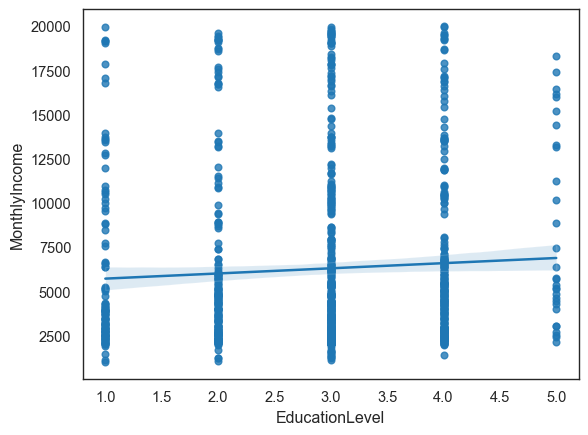

In [398]:
sns.regplot(data = dfconsultants, x = 'EducationLevel', y = 'MonthlyIncome')

<Axes: xlabel='Age', ylabel='EducationLevel'>

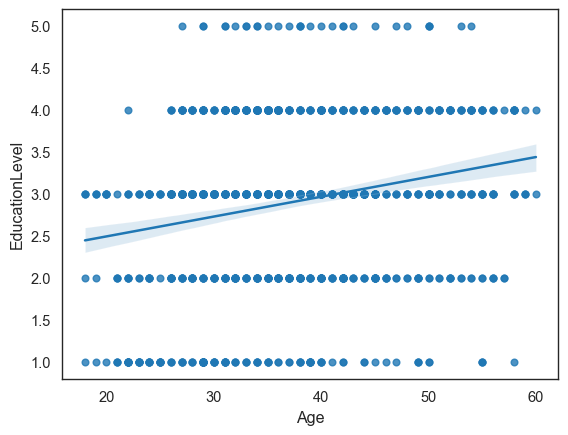

In [399]:
sns.regplot(data = dfconsultants, x = 'Age', y = 'EducationLevel')

<Axes: xlabel='AverageWeeklyHoursWorked', ylabel='EducationLevel'>

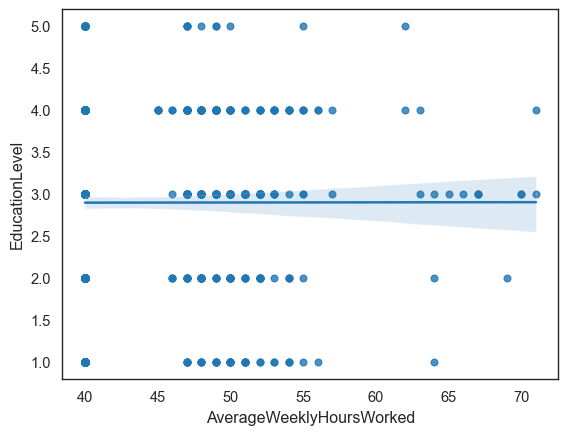

In [400]:
sns.regplot(data = dfconsultants, x = 'AverageWeeklyHoursWorked', y = 'EducationLevel')

Text(0.5, 1.0, 'Working Hours on Reported OverTime')

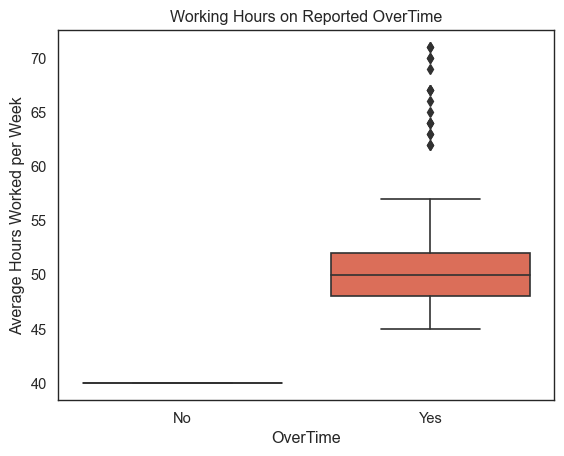

In [401]:
sns.boxplot(data = dfconsultants,  x = 'OverTime', y = 'AverageWeeklyHoursWorked', palette = 'rocket')
plt.ylabel('Average Hours Worked per Week')
plt.title("Working Hours on Reported OverTime")

Text(0.5, 1.0, 'WorkLife Balance for Different Marital Groups')

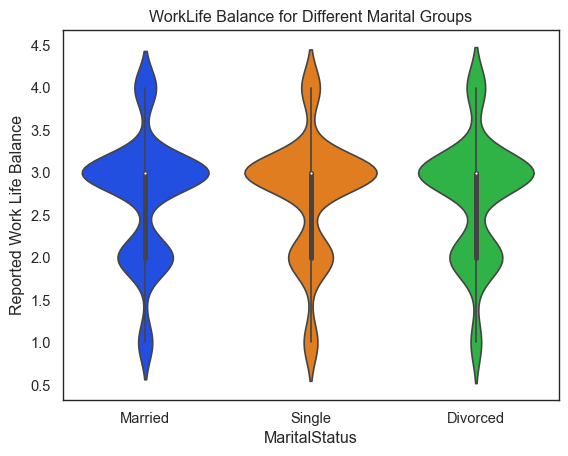

In [402]:
sns.violinplot(data = dfconsultants, y = 'WorkLifeBalance', x = 'MaritalStatus', palette = 'bright')
plt.ylabel('Reported Work Life Balance')
plt.title("WorkLife Balance for Different Marital Groups")

## Data Modelling

The most important pieces of numerical/continuous data which appear to have significance in resignation is age, income and hours worked per week. With the most important of these factors appearing to be hours worked. Therefore I would like to try modelling age vs hours worked and income vs hours worked to try and find a cluster of employees who are likely to resign.

In [403]:
target = dfconsultants['Resigned']
target = target.replace('Yes', 1)
target = target.replace('No', 0)
target = target.reset_index()
target.drop(columns = ['index'], inplace = True)
target.to_numpy()
target

,Resigned
0,0
1,1
2,0
3,0
4,0
...,...
956,0
957,0
958,0
959,0


In [404]:
scaled_age_hours = dfconsultants[['Age', 'AverageWeeklyHoursWorked']]
scaled_age_hours = preprocessing.normalize(scaled_age_hours, axis = 0)
scaled_age_hours.shape

(961, 2)

### Creating training and testing split

In [405]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_age_hours, target, test_size=0.2, random_state=7)

In [406]:
def plot_agehours(dataset, hue=None):
    sns.scatterplot(x=dataset[:,0], y=dataset[:,1], color='k', alpha=0.8, hue=hue, palette='rainbow')
    plt.xlabel('Scaled Age Distribution')
    plt.ylabel('Scaled Hours Worked/Week')
    plt.title('Clustered Age vs Working Hours')

In [407]:
kdf_agehours = 4
km_1 = KMeans(n_clusters=kdf_agehours, random_state=80)
c_labels_1 = km_1.fit_predict(X_train1)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


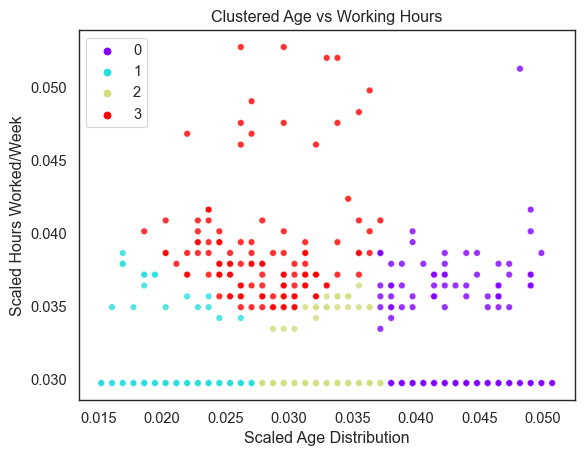

In [408]:
plot_agehours(X_train1, hue = c_labels_1)

With k= 4, cluster 1 may hold some validity due to the above demonstrations visualising a significant density of employees in the lower left quadrant, however this is not sound via modelling methods so will continue to the evaluation. An intertia list, silhouette method and ARI score will be used

In [409]:
def inertia_graph(x):
    inertia_lst = [] 
    k_values = range(1, 11) 
    for k in k_values: 
        km_model = KMeans(n_clusters=k, random_state=42) 
        km_model.fit(x) 
        inertia_lst.append(km_model.inertia_)
    #adjusting graph values
    plt.figure(figsize=(10,6)) 
    plt.plot(k_values, inertia_lst) 
    plt.xticks(k_values) 
    plt.title('Elbow Method Evaluation')
    plt.xlabel("K-Value") 
    plt.ylabel("Inertia") 
    plt.show()

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

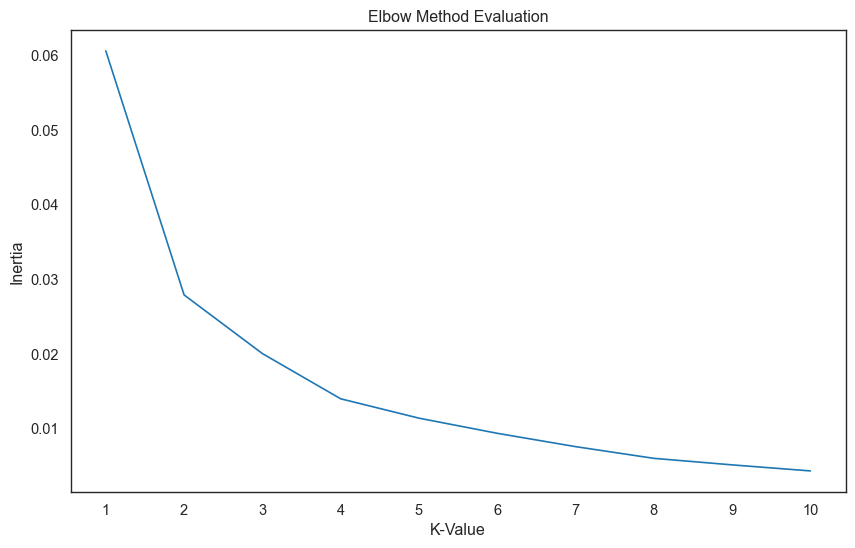

In [410]:
inertia_graph(X_train1)

In [411]:
def plot_silhouette_graph(dataset, k_range=range(2, 11)): 
    silhouette_coefficients = [] 
    for k in k_range: 
        km_model = KMeans(n_clusters=k, random_state=42) 
        km_model.fit(dataset) 
        score = silhouette_score(dataset, km_model.labels_) 
        silhouette_coefficients.append(score) 
    plt.figure(figsize=(10,6)) 
    plt.plot(k_range, silhouette_coefficients) 
    plt.xticks(k_range) 
    plt.xlabel("Number of Clusters") 
    plt.ylabel("Silhouette Coefficient") 
    plt.show()

In [412]:
X_train1df = pd.DataFrame(data = X_train1)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

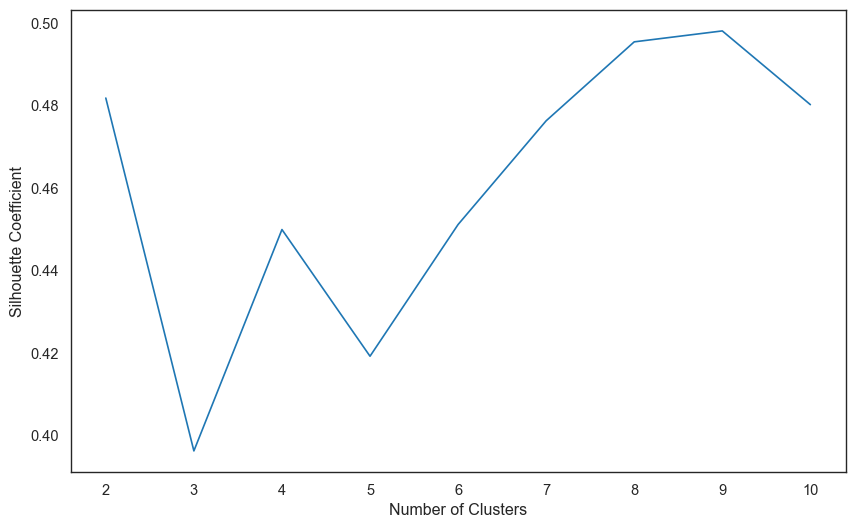

In [413]:
plot_silhouette_graph(X_train1df)

From the above column we can see that inertia drops significantly after 2 clusters for K-means and there is a large drop-off for silhouette score from 2 to 3. Silhouette score improves at 8-9 so there may be some application to have ratio of clusters corresponding to different target values.

In [414]:
y_train = y_train1.to_numpy()

In [415]:
y_train.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [416]:
y_train = y_train.flatten()

In [417]:
ari_scores = [] 
k_range=range(2, 10)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

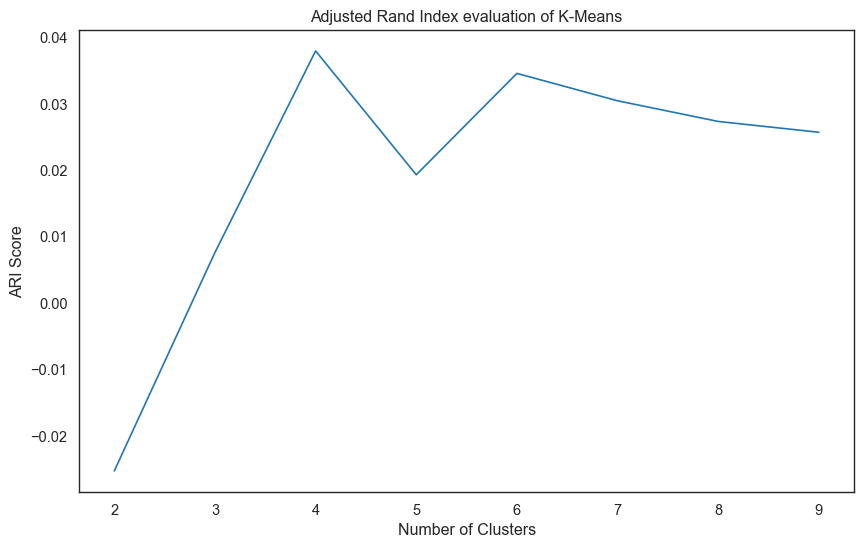

In [418]:
for k in k_range: 
    km_model = KMeans(n_clusters=k, random_state=80) 
    km_model.fit(X_train1) 
    score = adjusted_rand_score(y_train, km_model.labels_) 
    ari_scores.append(score) 
plt.figure(figsize=(10,6)) 
plt.plot(k_range, ari_scores) 
plt.xticks(k_range) 
plt.xlabel("Number of Clusters") 
plt.ylabel("ARI Score")
plt.title('Adjusted Rand Index evaluation of K-Means')
plt.show()

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


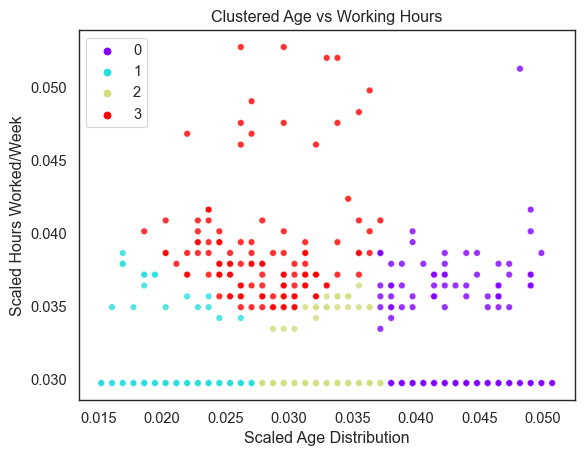

In [419]:
kdf_agehours = 4
km_1 = KMeans(n_clusters=kdf_agehours, random_state=80)
c_labels_2 = km_1.fit_predict(X_train1)
plot_agehours(X_train1, hue = c_labels_1)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


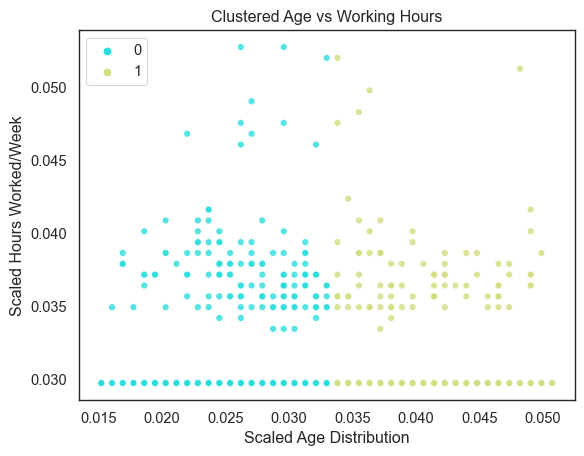

In [420]:
kdf_agehours = 2
km_1 = KMeans(n_clusters=kdf_agehours, random_state=80)
c_labels_2 = km_1.fit_predict(X_train1)
plot_agehours(X_train1, hue = c_labels_2)

### k-means Monthly Income vs Hours Worked

In [421]:
scaled_income_hours = dfconsultants[['MonthlyIncome', 'AverageWeeklyHoursWorked']]
scaled_income_hours = preprocessing.normalize(scaled_income_hours, axis = 0)
scaled_income_hours.shape

(961, 2)

In [422]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_income_hours, target, test_size=0.2, random_state=7)

In [423]:
def plot_incomehours(dataset, hue=None):
    sns.scatterplot(x=dataset[:,0], y=dataset[:,1], color='k', alpha=0.8, hue=hue, palette='rainbow')
    plt.xlabel('Scaled Income Distribution')
    plt.ylabel('Scaled Hours Worked/Week')
    plt.title('Clustered Income vs Working Hours')

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


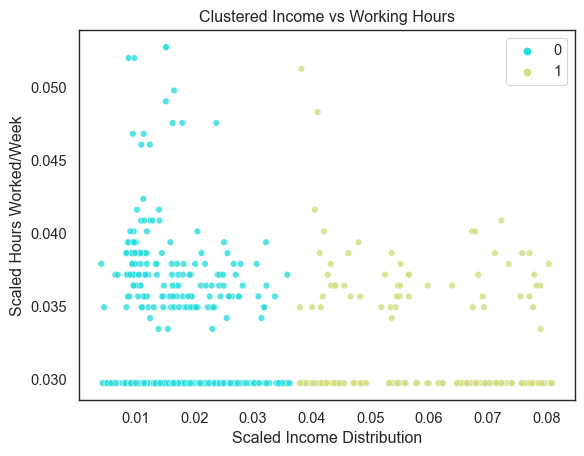

In [424]:
kdf_incomehours = 2
km_1 = KMeans(n_clusters=kdf_incomehours, random_state=80)
c_labels_3 = km_1.fit_predict(X_train2)
plot_incomehours(X_train2, hue = c_labels_3)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

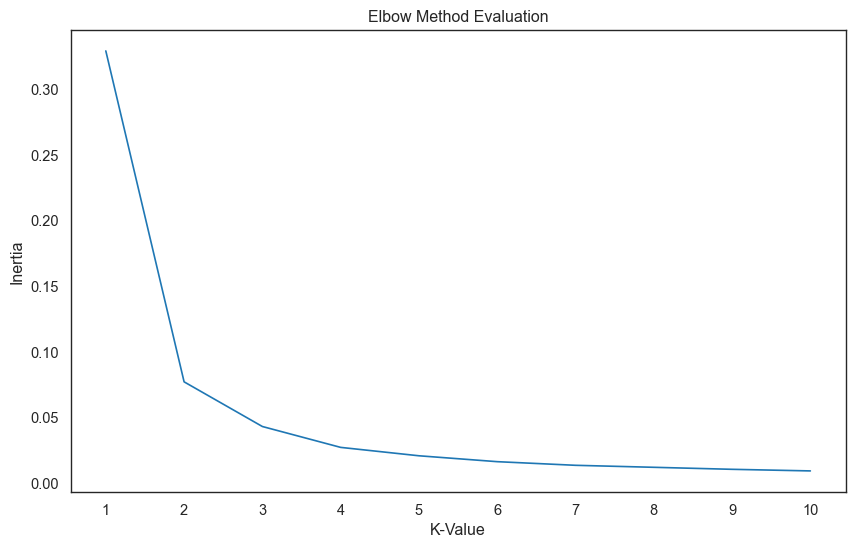

In [425]:
inertia_graph(X_train2)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

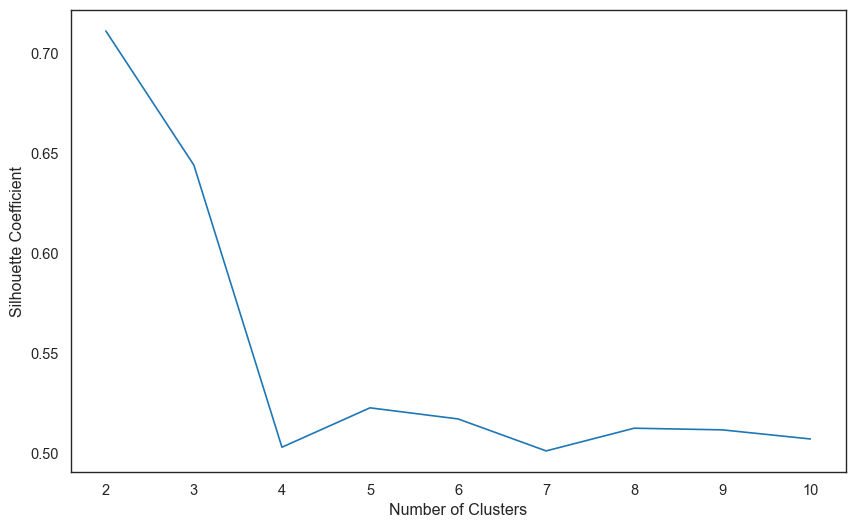

In [426]:
plot_silhouette_graph(X_train2)

In [427]:
y_train2 = y_train2.to_numpy()
y_train2 = y_train2.reshape(-1)
y_train2 = y_train2.flatten()

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

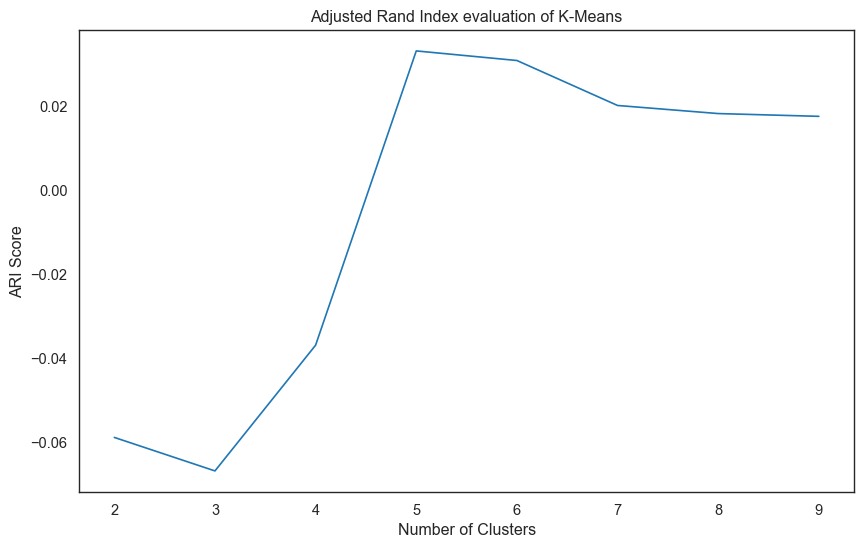

In [428]:
ari_scores = [] 
k_range=range(2, 10)
for k in k_range: 
    km_model = KMeans(n_clusters=k, random_state=80) 
    km_model.fit(X_train2) 
    score = adjusted_rand_score(y_train2, km_model.labels_) 
    ari_scores.append(score) 
plt.figure(figsize=(10,6)) 
plt.plot(k_range, ari_scores) 
plt.xticks(k_range) 
plt.xlabel("Number of Clusters") 
plt.ylabel("ARI Score")
plt.title('Adjusted Rand Index evaluation of K-Means')
plt.show()

# Testing Sets for K-Means

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


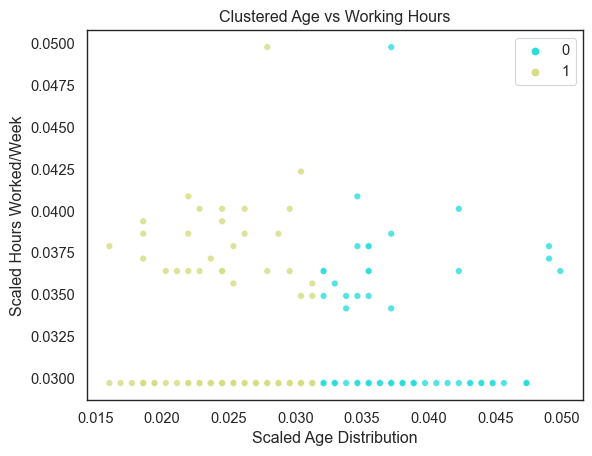

In [429]:
#testing for Age v Hours Worked
kdf_agehours = 2
km_1 = KMeans(n_clusters=kdf_agehours, random_state=80)
c_test_1 = km_1.fit_predict(X_test1)
plot_agehours(X_test1, hue = c_test_1)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


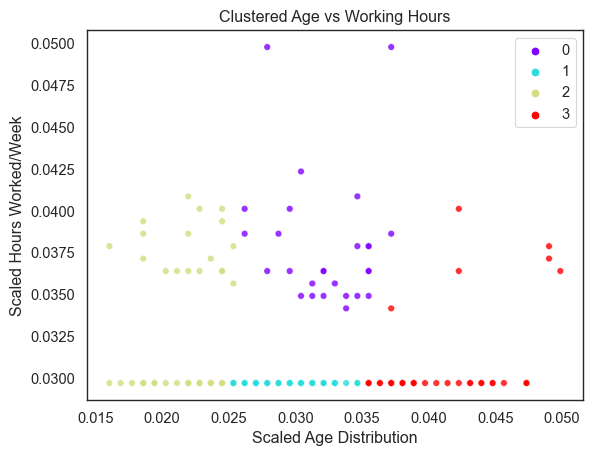

In [430]:
kdf_agehours = 4
km_1 = KMeans(n_clusters=kdf_agehours, random_state=80)
c_test_2 = km_1.fit_predict(X_test1)
plot_agehours(X_test1, hue = c_test_2)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


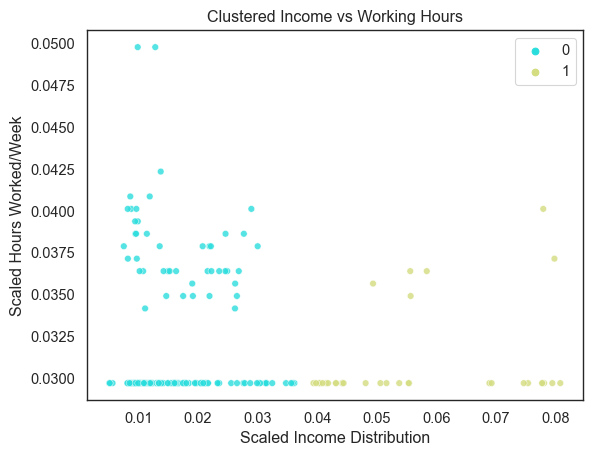

In [431]:
#testing income v hours worked
kdf_incomehours = 2
km_1 = KMeans(n_clusters=kdf_incomehours, random_state=80)
c_test_3 = km_1.fit_predict(X_test2)
plot_incomehours(X_test2, hue = c_test_3)

### DB Scan Age v Hours

In [432]:
#using a guessed epsilon value and dimensions * 2 as a general 
#rule of thumb to pick min_samples (https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)
db_xset1 = DBSCAN(eps = 0.004, min_samples=4)
c_labels_4 = db_xset1.fit_predict(X_train1)

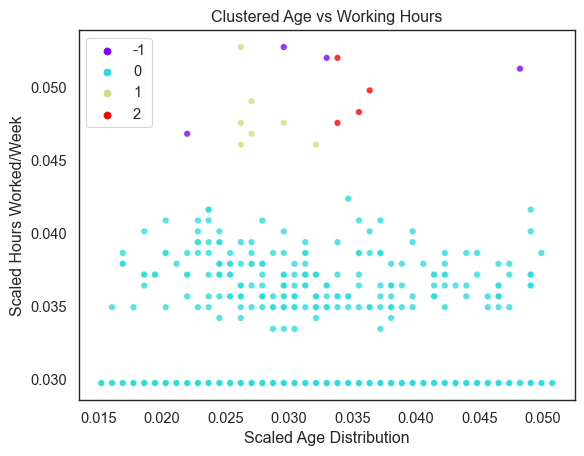

In [433]:
plot_agehours(X_train1, hue = c_labels_4)

## K Nearest Neighbours

In [434]:
KNN = NearestNeighbors(n_neighbors=20)
KNN.fit(X_train1)
distances, indices = KNN.kneighbors(X_train1)

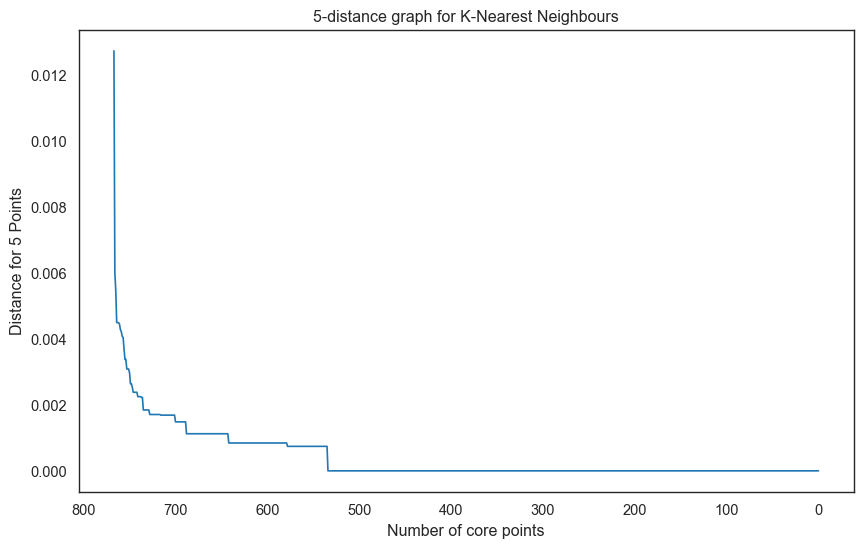

In [435]:
k_distance = distances[:,  4] 
k_distance = np.sort(k_distance)
plt.figure(figsize=(10,6))
plt.plot(k_distance)
plt.title("5-distance graph for K-Nearest Neighbours")
plt.ylabel("Distance for 5 Points")
plt.xlabel("Number of core points") 
plt.gca().invert_xaxis()

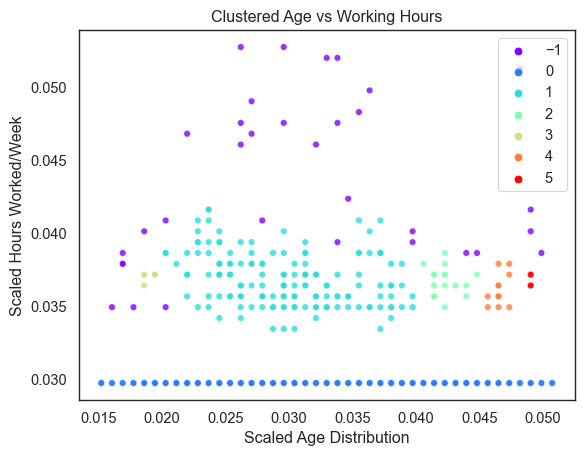

In [436]:
db_xset1 = DBSCAN(eps=0.0015, min_samples=4)
c_labels_4 = db_xset1.fit_predict(X_train1)
plot_agehours(X_train1, c_labels_4)
plt.legend(loc='upper right')

# DB Scan Income Hours

In [437]:
db_xset2 = DBSCAN(eps = 0.004, min_samples=4)
#using a guessed epsilon value and dimensions * 2 as a general 
#rule of thumb to pick min_samples (https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)
c_labels_5 = db_xset1.fit_predict(X_train2)

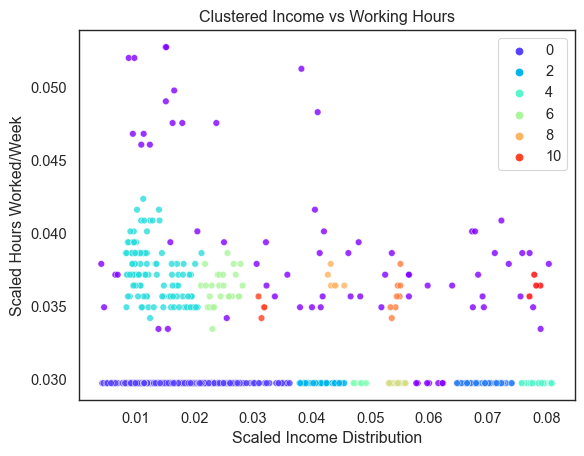

In [438]:
plot_incomehours(X_train2, hue = c_labels_5)

In [439]:
KNN = NearestNeighbors(n_neighbors=20)
KNN.fit(X_train2)
distances, indices = KNN.kneighbors(X_train2)

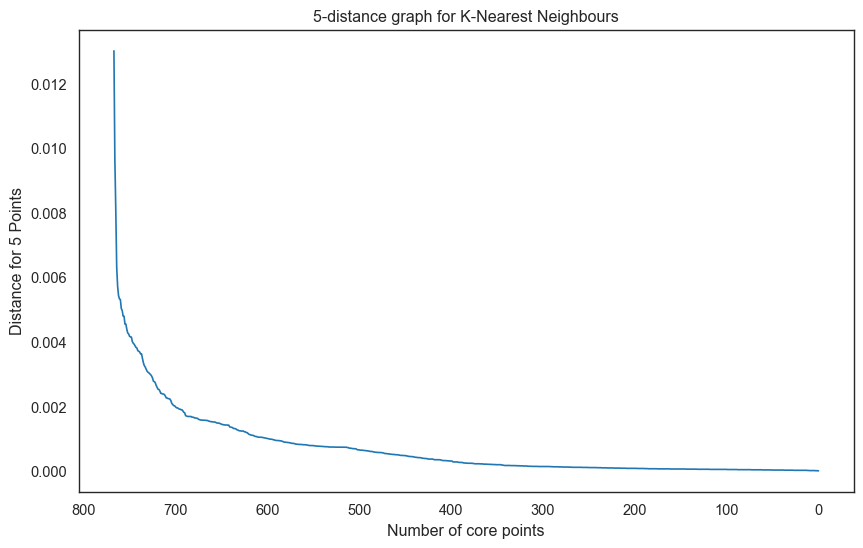

In [440]:
k_distance = distances[:,  4] 
k_distance = np.sort(k_distance)
plt.figure(figsize=(10,6))
plt.plot(k_distance)
plt.title("5-distance graph for K-Nearest Neighbours")
plt.ylabel("Distance for 5 Points")
plt.xlabel("Number of core points") 
plt.gca().invert_xaxis()

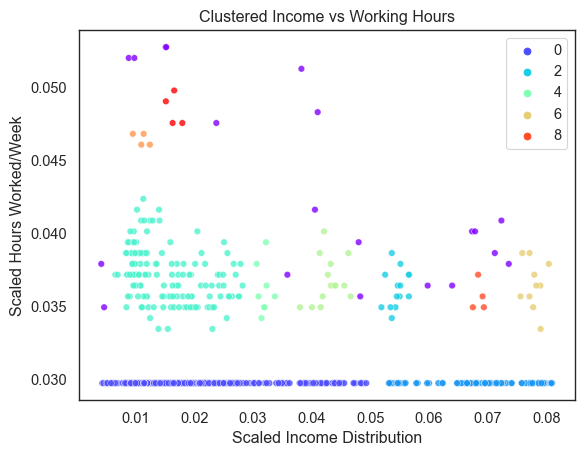

In [441]:
db_xset2 = DBSCAN(eps = 0.0025, min_samples=4)
c_labels_6 = db_xset2.fit_predict(X_train2)
plot_incomehours(X_train2, hue = c_labels_6)

# Testing Sets for DB-Scan

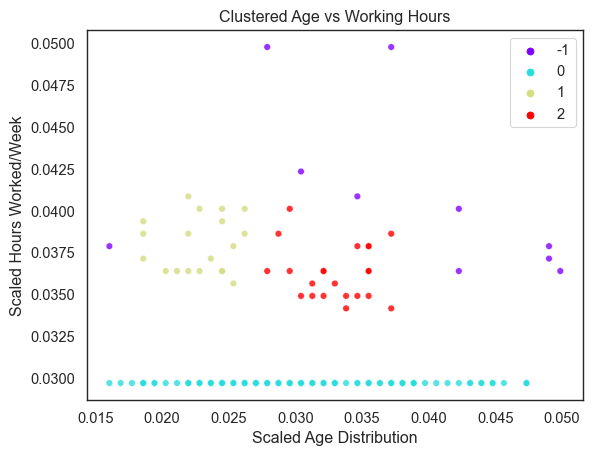

In [442]:
db_xtest2 = DBSCAN(eps = 0.0015, min_samples=4)
c_test_4 = db_xset2.fit_predict(X_test1)
plot_agehours(X_test1, hue = c_test_4)
plt.legend(loc='upper right')

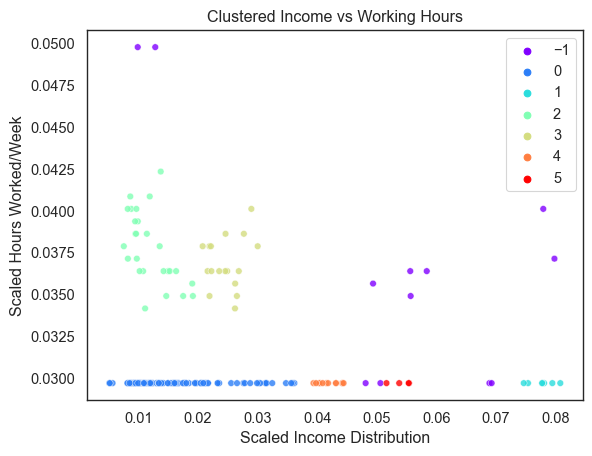

In [443]:
db_xtest3 = DBSCAN(eps = 0.0025, min_samples=4)
c_test_5 = db_xtest3.fit_predict(X_test2)
plot_incomehours(X_test2, hue = c_test_5)

In [444]:
y_test1 = y_test1.reset_index()
y_test1.drop(columns = ['index'], inplace = True)

In [445]:
y_test2 = y_test2.reset_index()
y_test2.drop(columns = ['index'], inplace = True)

In [446]:
KMTestAgeHours = pd.DataFrame(data = X_test1, columns= ('Age', 'WorkedHours'))
KMTestAgeHours['Target'] = y_test1
KMTestAgeHours['Testing Values K = 2'] = c_test_1
KMTestAgeHours['Testing Values K = 4'] = c_test_2

In [447]:
KMTestIncomeHours = pd.DataFrame(data = X_test2, columns = ('Income', 'WorkedHours'))
KMTestIncomeHours['Target'] = y_test2
KMTestIncomeHours['TestingValues'] = c_test_3

In [448]:
DBSCanAgeHours = pd.DataFrame(data = X_test1, columns= ('Age', 'WorkedHours'))
DBSCanAgeHours['Target'] = y_test1
DBSCanAgeHours['DBScan Model'] = c_test_4

In [449]:
DBSCanIncomeHours = pd.DataFrame(data = X_test2, columns=('MonthlyIncome', 'WorkedHours'))
DBSCanIncomeHours['Target'] = y_test2
DBSCanIncomeHours['DBScan Model'] = c_test_5

In [450]:
def evaluation(x, y):
    m = v_measure_score(x, y)
    n = homogeneity_score(x, y)
    o = completeness_score(x, y)
    p = rand_score(x, y)
    print('The V-Measure score is', m)
    print('The Homogenity Score is', n)
    print('The completeness score is', o)
    print('The Rand Score is', p)
    

In [451]:
print('K-Means, Age v Hours, K = 2')
evaluation(KMTestAgeHours['Target'], KMTestAgeHours['Testing Values K = 2'])
print('\n')
print('K-Means, Age v Hours, K = 4')
evaluation(KMTestAgeHours['Target'], KMTestAgeHours['Testing Values K = 4'])
print('\n')
print('K-Means, Income v Hours')
evaluation(KMTestIncomeHours['Target'], KMTestIncomeHours['TestingValues'])
print('\n')
print('DBScan, Age v Hours')
evaluation(DBSCanAgeHours['Target'], DBSCanAgeHours['DBScan Model'])
print('\n')
print('DBScan, Income v Hours')
evaluation(DBSCanIncomeHours['Target'], DBSCanIncomeHours['DBScan Model'])

K-Means, Age v Hours, K = 2
The V-Measure score is 0.015222811277992352
The Homogenity Score is 0.019974744514222327
The completeness score is 0.012297315843838237
The Rand Score is 0.4990284974093264


K-Means, Age v Hours, K = 4
The V-Measure score is 0.031906760035788545
The Homogenity Score is 0.06728919188996474
The completeness score is 0.020911134160939513
The Rand Score is 0.40311960276338515


K-Means, Income v Hours
The V-Measure score is 0.033429763746191866
The Homogenity Score is 0.03518042143218142
The completeness score is 0.031845080215666746
The Rand Score is 0.5732944732297064


DBScan, Age v Hours
The V-Measure score is 0.028407826284016467
The Homogenity Score is 0.04352985970793602
The completeness score is 0.02108352564120435
The Rand Score is 0.5798791018998273


DBScan, Income v Hours
The V-Measure score is 0.03526316347311888
The Homogenity Score is 0.07463064588578426
The completeness score is 0.023085577853392245
The Rand Score is 0.4530980138169257
